### 1. Importar todas las librerías necesarias.

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. Inicializar algunas variables que después modificaremos. 

In [2]:
mainhost = []
dataset = []
df = None

### 3. Crear una función para generar los hostnames en base a unas reglas

In [3]:
def set_hostnames(number_of_hosts: int) -> None:
    system = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1
    entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    pais = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    contar = []
    
    for i in range(number_of_hosts):
        paises = random.choice(pais)
        sistema_entorno = random.choice(system) + random.choice(entorno)
        sistema_entorno += paises
        contar.append(sistema_entorno)
        sistema_entorno += str(contar.count(sistema_entorno)).zfill(3)
        mainhost.append(sistema_entorno)

### 4. Crear una función para obtener el nombre del SO. 

In [4]:
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknow'

### 5. Crear una función para obtener el nombre del entorno. 

In [5]:
def get_enviroment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknow'

### 6. Creamos una función para obtener el nombre del país.

In [6]:
def get_country(hostname: str) -> str:
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname[2:5] == 'FRA':
        return 'France'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    else:
        return 'Unknow'

### 7. Crear una función para generar el DataFrame.

In [7]:
def set_dataframe(count: int) -> None:
    global df 
    
    set_hostnames(count)
    
    for hostname in mainhost:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'enviroment': get_enviroment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:]) 
        })
    df = pd.DataFrame(dataset)

### 8. Crear el DataFrame

In [8]:
set_dataframe(1500)

In [9]:
df

,hostname,os,enviroment,country,node
0,ASITA001,AIX,Staging,Italy,1
1,HSFRA001,HP-UX,Staging,France,1
2,APESP001,AIX,Production,Spain,1
3,LPIRL001,Linux,Production,Ireland,1
4,LPIRL002,Linux,Production,Ireland,2
...,...,...,...,...,...
1495,LDFRA009,Linux,Development,France,9
1496,SDIRL012,Solaris,Development,Ireland,12
1497,LSESP024,Linux,Staging,Spain,24
1498,STDEU024,Solaris,Testing,Germany,24


### 9. Guardar el DataFrame generado en un fichero CSV

In [10]:
df.to_csv('host.csv', index=False, header=True)

In [11]:
hosts_df = pd.read_csv('host.csv')

In [12]:
hosts_df

,hostname,os,enviroment,country,node
0,ASITA001,AIX,Staging,Italy,1
1,HSFRA001,HP-UX,Staging,France,1
2,APESP001,AIX,Production,Spain,1
3,LPIRL001,Linux,Production,Ireland,1
4,LPIRL002,Linux,Production,Ireland,2
...,...,...,...,...,...
1495,LDFRA009,Linux,Development,France,9
1496,SDIRL012,Solaris,Development,Ireland,12
1497,LSESP024,Linux,Staging,Spain,24
1498,STDEU024,Solaris,Testing,Germany,24


### 10.Generar un único gráfico agrupando para cada país (country) los entornos (enviroment). 

In [13]:
vx = hosts_df
vx_group = vx.groupby(['country', vx['enviroment']]).size()
vx_group

country  enviroment 
France   Development     16
         Integration     12
         Production      47
         Staging         32
         Testing         38
Germany  Development     41
         Integration     33
         Production     117
         Staging         96
         Testing         72
Ireland  Development     44
         Integration     41
         Production     141
         Staging        114
         Testing        116
Italy    Development     27
         Integration     16
         Production      69
         Staging         62
         Testing         49
Norway   Development      9
         Integration     15
         Production      19
         Staging         23
         Testing         20
Spain    Development     14
         Integration     24
         Production      82
         Staging         53
         Testing         58
dtype: int64

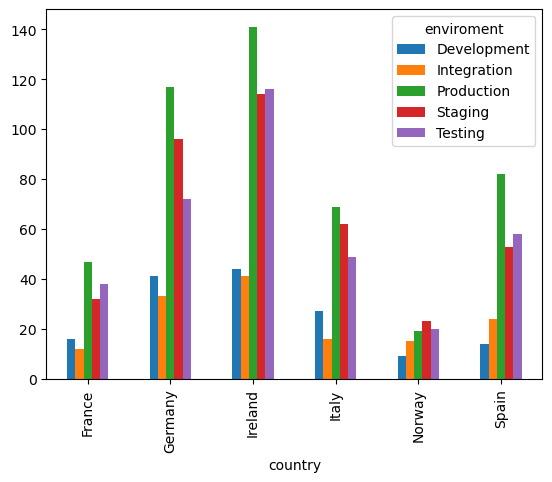

In [14]:
vx_group.unstack().plot(kind='bar')
plt.show;

### 11.Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.

In [15]:
# Insumos para el grafico de la posición 0,0
vm = hosts_df
vm_group = vx.groupby(['country', vm['os']]).size().unstack()
vm_group

os,AIX,HP-UX,Linux,Solaris
country,,,,
France,30,13,62,40
Germany,73,33,138,115
Ireland,92,39,188,137
Italy,41,25,96,61
Norway,17,13,32,24
Spain,50,24,100,57


In [16]:
# Insumos para el grafico de la posicion 0,1
os = hosts_df
os_group = vx.groupby(['os']).size()
os_group

os
AIX        303
HP-UX      147
Linux      616
Solaris    434
dtype: int64

In [17]:
array_os = os_group.values
b = np.array([len(hosts_df)]*4)
y = [p/a*100 for p, a in zip(array_os, b)]
result = list(y)
result = [round(zx, 2) for zx in result]
rn = os_group.index.tolist()
rn

['AIX', 'HP-UX', 'Linux', 'Solaris']

In [18]:
mnb = []
index = os_group.index.tolist()
for nj, yu in zip(rn, result):
    mnb.append(nj + '('+ str(yu)+ '% )')
mnb

['AIX(20.2% )', 'HP-UX(9.8% )', 'Linux(41.07% )', 'Solaris(28.93% )']

In [19]:
# Insumos para el gráfico de la posición 1,1
host = hosts_df
host_group = host.groupby(['enviroment', host['country']]).size().unstack()
host_group

country,France,Germany,Ireland,Italy,Norway,Spain
enviroment,,,,,,
Development,16,41,44,27,9,14
Integration,12,33,41,16,15,24
Production,47,117,141,69,19,82
Staging,32,96,114,62,23,53
Testing,38,72,116,49,20,58


In [20]:
#Insumos para el grafico de la posición 1, 0
klim = hosts_df
klim_group = klim.groupby(['country']).size()
klim_group = klim_group.to_frame('count')
klim_group = klim_group.sort_values('count', ascending=False)
klim_group

,count
country,
Ireland,456
Germany,359
Spain,231
Italy,223
France,145
Norway,86


In [21]:
cx=klim_group.sort_values('count')
cv = (cx['count']).to_list()
cm = cx.index.to_list()
cw = np.arange(len(cm))
cx

,count
country,
Norway,86
France,145
Italy,223
Spain,231
Germany,359
Ireland,456


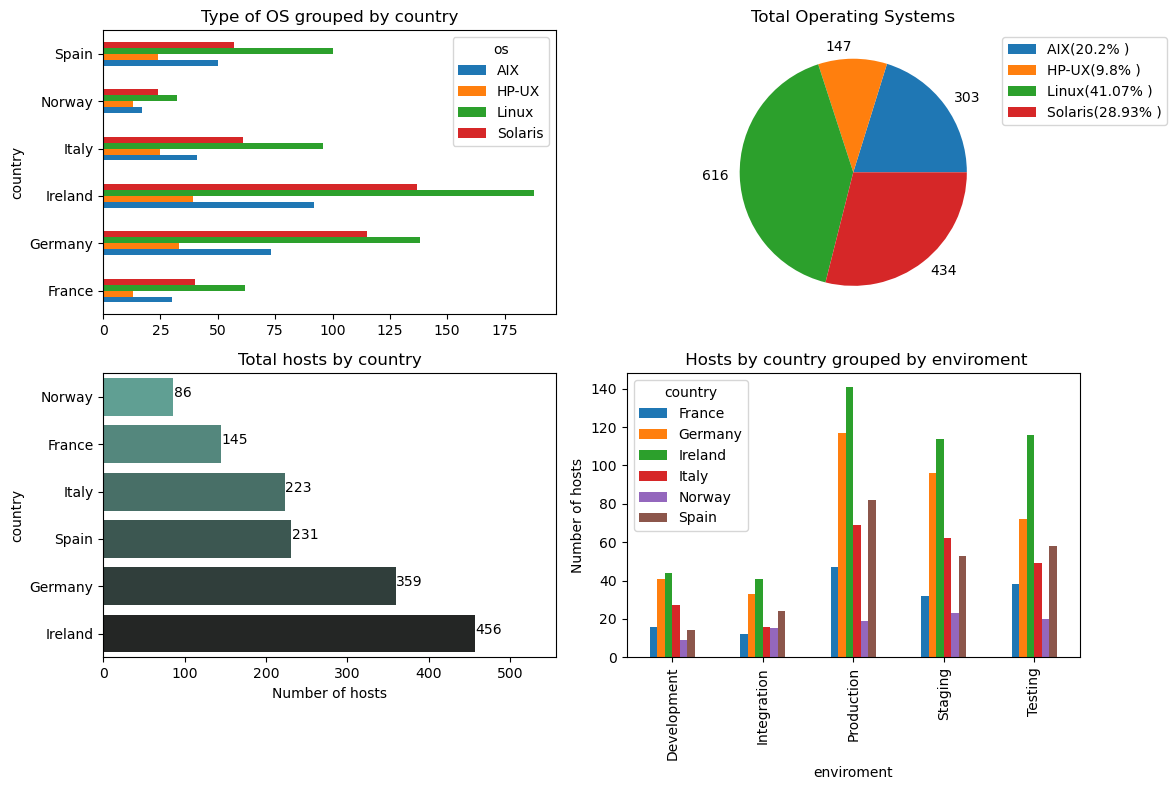

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

vm_group.plot(kind='barh', ax=axs[0, 0])
axs[0, 0].set_title('Type of OS grouped by country')

ax = axs[0, 1]
ax.pie(os_group, labels=os_group)
ax.legend(mnb, bbox_to_anchor=(1, 1))
ax.set_title('Total Operating Systems')

paleta = sns.color_palette("dark:#5A9_r") 
ax = sns.barplot(x=cx['count'], y=cx.index, palette = paleta, ax=axs[1, 0])
axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_xlim(0,max(klim_group['count'])+100)
for yu, jb in zip(cw, cv):
    axs[1, 0].annotate(str(jb), xy=(jb + 0.6, yu - 0.00005))

host_group.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title(' Hosts by country grouped by enviroment')
axs[1, 1].set_ylabel('Number of hosts')

fig.tight_layout()
plt.show()